# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 250

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 250 total reviews
Scraping page 2
   ---> 500 total reviews
Scraping page 3
   ---> 750 total reviews
Scraping page 4
   ---> 1000 total reviews
Scraping page 5
   ---> 1250 total reviews
Scraping page 6
   ---> 1500 total reviews
Scraping page 7
   ---> 1750 total reviews
Scraping page 8
   ---> 2000 total reviews
Scraping page 9
   ---> 2250 total reviews
Scraping page 10
   ---> 2500 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Despite being a gold member...
1,Not Verified | Regarding the aircraft and seat...
2,Not Verified | I travelled with British Airway...
3,Not Verified | Food was lousy. Who ever is pl...
4,✅ Trip Verified | Had the worst experience. Th...


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [7]:
def trim_left(x):
    a = x.split('|')
    if len(a)>1:
        return a[1]
    else:
        return a[0]

In [8]:
df['reviews'] = df['reviews'].apply(trim_left)
df.head()

,reviews
0,"Despite being a gold member, the British Air..."
1,Regarding the aircraft and seat: The business...
2,I travelled with British Airways from Sweden ...
3,Food was lousy. Who ever is planning the Asi...
4,Had the worst experience. The flight from Lon...


In [9]:
def find_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return(soup.find())

In [10]:
has_tags = df['reviews'].apply(find_tags)

In [11]:
has_tags.unique()

array([None], dtype=object)

In [12]:
# there is no html tags in our data, so we are not needed to remove those

In [13]:
import re
import string

# Remove punctuation
df['reviews'] = df['reviews'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# Convert to lowercase
df['reviews'] = df['reviews'].apply(lambda x: x.lower())

In [14]:
from nltk.corpus import stopwords

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [15]:
from nltk.stem import PorterStemmer

# Perform stemming
# Stemming is the process of reducing a word to its base or root form, by removing any suffixes or prefixes that may be present. 
stemmer = PorterStemmer()
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))


In [16]:
print(df)

                                                reviews
0     despit gold member british airway staff heathr...
1     regard aircraft seat busi class seat flight pr...
2     travel british airway sweden lo angel via lond...
3     food lousi ever plan asian hindu vegetarian me...
4     worst experi flight london toronto got delay m...
...                                                 ...
2495  first class loung heathrow reason quiet great ...
2496  first time travel long haul british airway gro...
2497  british airway flight helsinki london issu bra...
2498  british airway 3class boe 777200 use flight ba...
2499  flew british airway glasgow bangkok via heathr...

[2500 rows x 1 columns]


In [17]:
print(df[0:1])

                                             reviews
0  despit gold member british airway staff heathr...


In [18]:
pd.set_option("display.max_colwidth", None)
print(df[0:1])

                                                                                                                                                                                                                                                                                                                                                                                       reviews
0  despit gold member british airway staff heathrow liter could care slightest absolut turmoil logist damag wider impact terribl servic staff member repeat mantra “we oblig provid even updat first 24 hours” would make situat better proactiv updat empathi care lot actual lie told tell given care thought passeng actual individu show everi action word say better suit work away human


In [19]:
print(df)

In [20]:
df.head()

,reviews
0,despit gold member british airway staff heathrow liter could care slightest absolut turmoil logist damag wider impact terribl servic staff member repeat mantra “we oblig provid even updat first 24 hours” would make situat better proactiv updat empathi care lot actual lie told tell given care thought passeng actual individu show everi action word say better suit work away human
1,regard aircraft seat busi class seat flight pretti good suit type everi seat booth slide door extra privaci downsid travel coupl quit difficult interact ampl storag usb charg port seat pretti comfort someon find difficult sleep flight one time ive abl get minut sleep amen provid pretti averag compar airlin leather toiletri bag quit nice though slipper pair sock restroom flight small dont provid much way toiletri compar airlin free wifi busi class accept anoth exampl ba penni pinch recent year regard staff custom servic poor inattent beyond meal time offer water flight go find attend ask also offer snack rude time partner ask fork replac one provid quit clearli dirti attend incred rude respons left us shock differ custom seem receiv differ qualiti servic custom behind repeatedli greet polit name ask whether need anyth etc wherea partner afford level person servic disappoint paid price ticket expect level servic food pretti bad risotto partner chicken extrem cook rice look like porridg veget discolour flavourless bread nice though breakfast wasnt much better summari ba becom ryanair long haul custom servic way would expect premium airlin premium seat pay premium price averag servic option avail would choos ba day
2,travel british airway sweden lo angel via london decemb 2022 arriv lax one bag miss inform whereabout bag search someon 30 minut found point contact told bag left behind gave detail would stay told would contact day still contact tri call british airway custom servic woman airport didn’t give file refer number quit difficult tri locat bag final found refer number bag said would deliv coupl day told switch hotel gave address stay everyth fine coupl week went bag still nowher seen time fli home airport tri talk personnel tri locat bag said deliv first hotel stay even though given updat address ask sinc fli home guy counter told wasn’t problem figur question respons walk away manag saw came apolog colleagu would send someon fetch bag send either flight next one came home coupl day later receiv bag made complaint claim british airway websit sinc buy cloth toiletri vacat didn’t bag januari said would refund claim april almost may still receiv refund even multipl email convers don’t know anymor situat sinc appear one will help appal situat handl frankli disappoint british airway lack custom servic
3,food lousi ever plan asian hindu vegetarian meal clueless meal includ snack also lousi took us 2 hour go t5 t3 clear secur check place chaotic get board gate long line 40 minut wait someon check passport board pass seat premium economi ok passeng front reclin littl space window seat passeng cross overal good airlin
4,worst experi flight london toronto got delay miss connect flight halifax four includ infant toddler age 4 year despit delay miss connect flight ground staff help wait hour get talk us 12 told us book hotel us stay night ask go search hotel nice british airway least guy given consider travel travel children book accommod travel airlin


## Word Frequency Analysis

In [28]:
import nltk
from collections import Counter

# Tokenize the reviews into words
words = nltk.word_tokenize(df["reviews"].str.cat(sep=" "))

freq = Counter(words)
print(freq.most_common(15))


[('flight', 5434), ('ba', 3239), ('seat', 3169), ('servic', 2096), ('london', 1862), ('airway', 1708), ('british', 1704), ('time', 1698), ('food', 1569), ('crew', 1466), ('cabin', 1349), ('class', 1337), ('good', 1320), ('airlin', 1315), ('hour', 1285)]


## Sentiment Analysis

In [22]:
from textblob import TextBlob

# Create a function to get the sentiment of a text
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to the reviews column
df["sentiment"] = df["reviews"].apply(get_sentiment)

# Print the mean sentiment
print(df["sentiment"].mean())


0.0952254646171613


In [23]:
# ranges from -1 to 1 : -1 is negative 1 is positive review

## Topic Modeling

In [57]:
import gensim

# Tokenize the reviews into words
words = [nltk.word_tokenize(review) for review in df["reviews"]]

# Create a dictionary of words
dictionary = gensim.corpora.Dictionary(words)

# Create a corpus of the reviews
corpus = [dictionary.doc2bow(review) for review in words]

# Perform LDA topic modeling on the corpus
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)

# Print the top 10 words for each topic
for i, topic in lda.show_topics(num_topics=10, num_words=10, formatted=False):
    print("Topic {}: {}".format(i, ", ".join([word[0] for word in topic])))


Topic 0: flight, ba, hour, airway, british, would, us, book, custom, time
Topic 1: flight, good, servic, crew, seat, time, food, british, airway, london
Topic 2: seat, class, flight, busi, economi, ba, cabin, first, crew, club
Topic 3: flight, seat, ba, airway, british, airlin, food, london, servic, fli
Topic 4: ’, ba, t, seat, one, flight, check, plane, servic, food


In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the English language model for spaCy
nlp = spacy.load('en_core_web_sm')

# Define a function to preprocess the text data
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha]
    return " ".join(tokens)

# Apply the preprocessing function to the 'reviews' column
df['processed_reviews'] = df['reviews'].apply(preprocess_text)

# Create a CountVectorizer object to convert text data into a matrix of token counts
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = cv.fit_transform(df['processed_reviews'])

# Create an LDA model with 10 topics
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)

# Fit the LDA model to the document-term matrix
lda_model.fit(doc_term_matrix)

# Print the top 10 words for each topic
for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i}:")
    print([cv.get_feature_names()[j] for j in topic.argsort()[:-11:-1]])
    print()


Topic 0:
['check', 'ba', 'staff', 'flight', 'seat', 'tell', 'luggag', 'airway', 'british', 'ask']

Topic 1:
['flight', 'crew', 'cabin', 'seat', 'servic', 'time', 'meal', 'london', 'ba', 'food']

Topic 2:
['seat', 'flight', 'good', 'ba', 'board', 'loung', 'servic', 'food', 'time', 'economi']

Topic 3:
['flight', 'hour', 'delay', 'london', 'ba', 'arriv', 'cancel', 'connect', 'day', 'airport']

Topic 4:
['seat', 'class', 'busi', 'flight', 'ba', 'food', 'good', 'servic', 'cabin', 'crew']

Topic 5:
['ba', 'flight', 'book', 'custom', 'tell', 'refund', 'day', 'servic', 'bag', 'cancel']

Topic 6:
['airlin', 'british', 'airway', 'ba', 'flight', 'servic', 'london', 'pay', 'seat', 'fli']

Topic 7:
['seat', 'flight', 'hour', 'airlin', 'screen', 'plane', 'london', 'water', 'work', 'time']

Topic 8:
['time', 'review', 'pisa', 'airway', 'like', 'flight', 'alicant', 'amaz', 'british', 'manag']

Topic 9:
['flight', 'crew', 'time', 'cabin', 'ba', 'board', 'servic', 'passeng', 'heathrow', 'london']



## TF-IDF

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np



# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer to the text data and transform it into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(df['reviews'])

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names()

# Calculate the average TF-IDF score for each feature across all documents
tfidf_means = np.mean(tfidf_matrix, axis=0)

# Convert the sparse matrix to a dense matrix
dense_matrix = tfidf_means.reshape(-1, len(feature_names)).A[0]

# Convert the dense matrix to a list of tuples containing the feature names and their corresponding TF-IDF scores
tfidf_scores = list(zip(feature_names, dense_matrix))

# Sort the feature names by their TF-IDF scores
sorted_idx = [i for i in reversed(np.array(tfidf_scores)[:, 1].argsort())]

# Print the top 10 keywords and their TF-IDF scores
print("Top 10 keywords by TF-IDF score:")
list_TF =[]
for i in range(10):
    list_TF.append(tfidf_scores[sorted_idx[i]])
    print(tfidf_scores[sorted_idx[i]])


Top 10 keywords by TF-IDF score:
('a3501000', 9.997906555949278e-05)
('barrag', 9.974705960334058e-05)
('1925', 9.974705960334058e-05)
('transat', 9.969705831947656e-05)
('lunchbox', 9.96633949034247e-05)
('ryanaireasyjet', 9.96633949034247e-05)
('wellpack', 9.96633949034247e-05)
('garuda', 9.944816393135779e-05)
('drama', 9.939983966944456e-05)
('digit', 9.93977577200188e-05)


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Create a TF-IDF vectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the corpus and transform the corpus into a matrix of TF-IDF features
tfidf_matrix = vectorizer.fit_transform(df['reviews'])

# Get the feature names (i.e., words) that were used in the TF-IDF matrix
feature_names = vectorizer.get_feature_names()

# Calculate the sum of TF-IDF scores for each feature across all documents
feature_scores = np.asarray(tfidf_matrix.sum(axis=0)).ravel()

# Sort the feature names by their TF-IDF scores in descending order
sorted_idx = feature_scores.argsort()[::-1]

# Print the top 10 keywords and their TF-IDF scores
print("Top 10 keywords by TF-IDF score:")
for i in range(10):
    print(f"({feature_names[sorted_idx[i]]}, {feature_scores[sorted_idx[i]]})")


Top 10 keywords by TF-IDF score:
(flight, 155.53634865418303)
(seat, 114.34982224367567)
(ba, 107.33122704020934)
(servic, 83.30018506979128)
(airway, 74.37095091500241)
(british, 74.28825459432512)
(london, 72.7700001316306)
(time, 71.79428833597366)
(food, 71.7893681268196)
(good, 70.64086088199753)


# Visualizations 

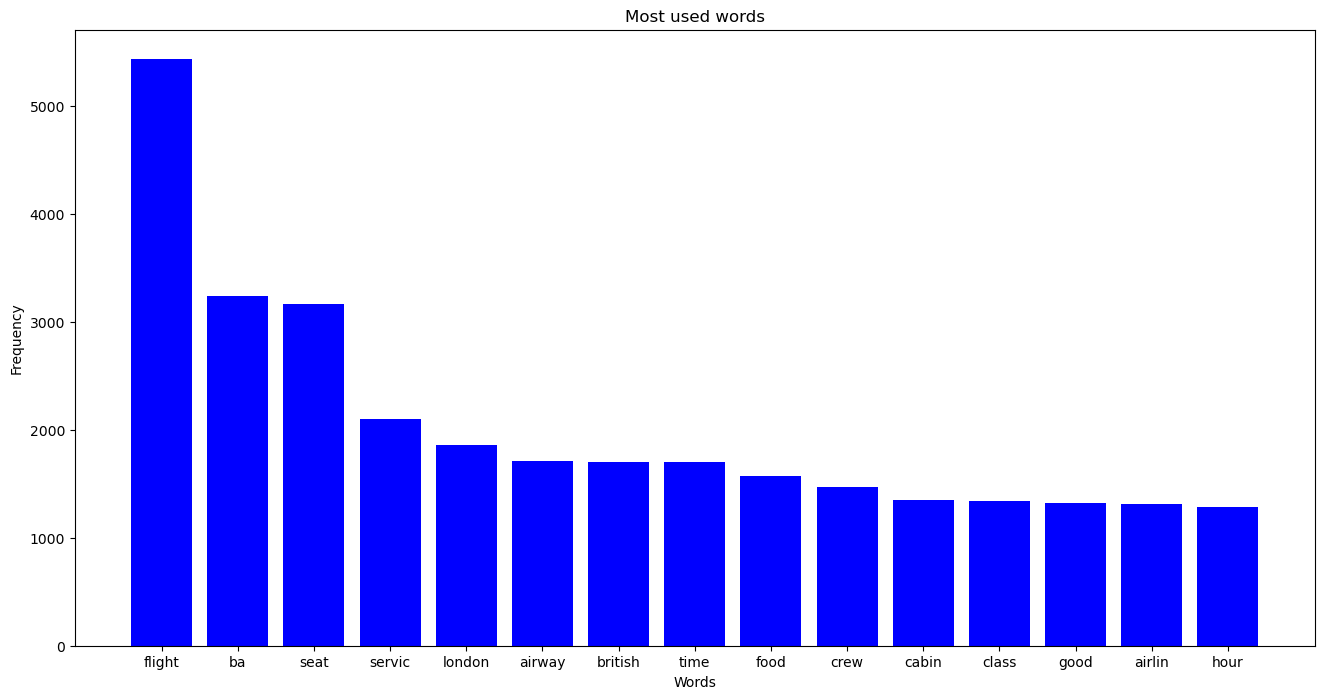

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))

labels = [i[0] for i in freq.most_common(15)]
freqs = [i[1] for i in freq.most_common(15)]

plt.bar(labels,freqs, color= 'blue')
plt.title("Most used words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.savefig("Most_used_words.png")
plt.show()


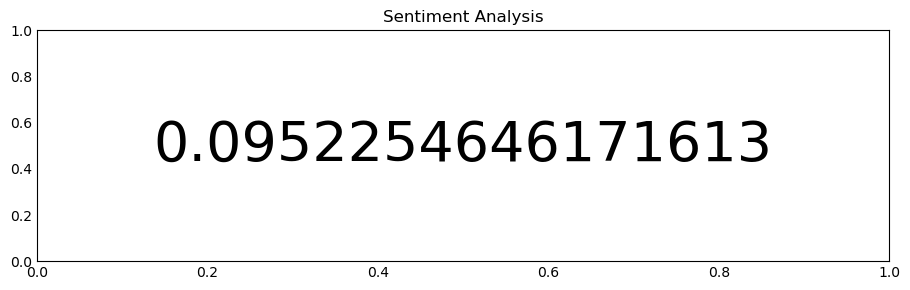

In [69]:
import matplotlib.pyplot as plt

# Define the number you want to display
num = df['sentiment'].mean()

# Create a new figure
fig, ax = plt.subplots(figsize=(11,3))

# Set the title and axis limits
ax.set_title('Sentiment Analysis')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Display the number in a text box
ax.text(0.5, 0.5, str(num), ha='center', va='center', fontsize=40)

# Hide the axis ticks and labels
ax.tick_params(axis='both', which='both', length=0)

plt.savefig("Sentiment.png")
# Display the figure
plt.show()


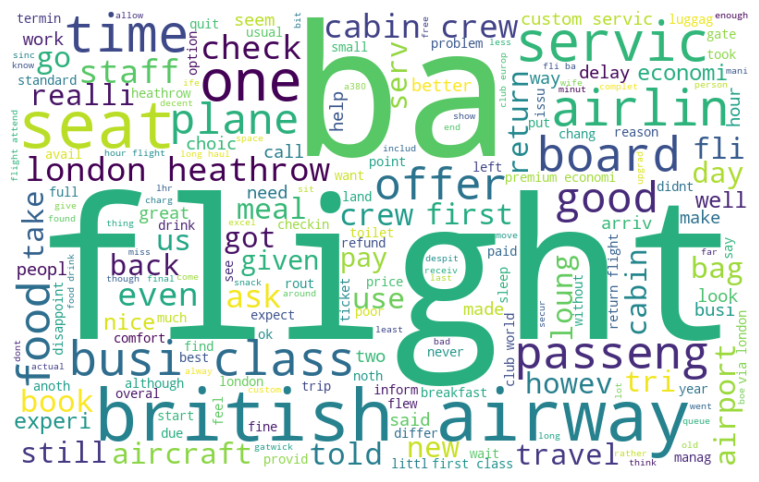

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
all_reviews = ' '.join(df['reviews'])
fig, ax = plt.subplots(figsize=(14,6))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=500, background_color='white').generate(all_reviews)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.savefig("Word_Cloud.png")
plt.show()


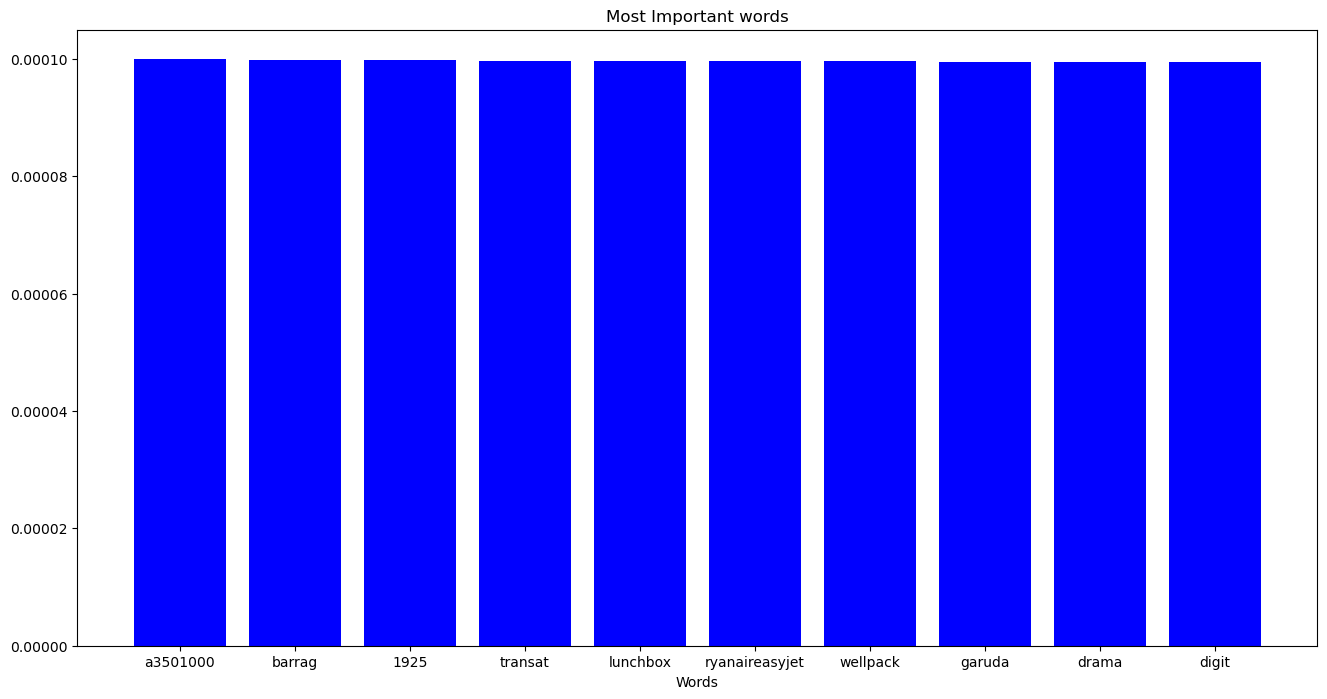

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))

labels = [i[0] for i in list_TF]
freqs = [i[1] for i in list_TF]

plt.bar(labels,freqs, color= 'blue')
plt.title("Most Important words")
plt.xlabel("Words")
plt.show()

In [65]:
df.describe()

,sentiment
count,2500.000000
mean,0.095225
std,0.177004
min,-1.000000
25%,-0.008333
50%,0.088889
75%,0.192493
max,1.000000


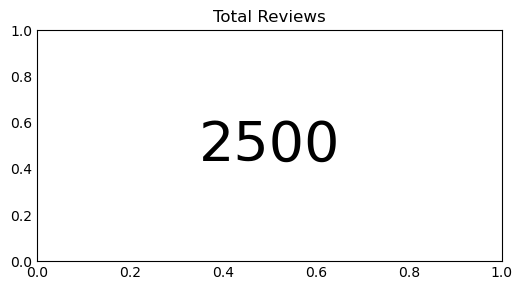

In [70]:
import matplotlib.pyplot as plt

# Define the number you want to display
num = 2500

# Create a new figure
fig, ax = plt.subplots(figsize=(6,3))

# Set the title and axis limits
ax.set_title('Total Reviews')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Display the number in a text box
ax.text(0.5, 0.5, str(num), ha='center', va='center', fontsize=40)

# Hide the axis ticks and labels
ax.tick_params(axis='both', which='both', length=0)

plt.savefig("Total_Reviews.png")
# Display the figure
plt.show()
